# Interpolation Based Visualization of Solutions.

### Summary
This notebook describes the use of interpolation in the visualization of analytical or discrete known solutions. To visualize a given solution the problem domain is partitioned into a mesh of finite elements. The discretization is then represented in terms of text files storing the corresponding nodal and elemental data. In a second step the solution is evaluated at the nodal points and the code uses Python interpolation based algorithms to extend the solution to a larger number of points. In the final step the solution is visualized using Python embedded contour plotting functions.

### Solution
Assume we want to visualize the scalar function given below in a rectangular domain of dimensions $l \times h$ using 4-noded bi-lineal elements of characteristic size $c$:

$$u = {({x^2} + {y^2}}) ^p$$

and where $p$ is a problem specific parameter.

# Algortihm
## Required modules
The code is based on the following modules (i) elasticity.py storing the solutions to visualize (ii) generategeo.py storing geometry files for the discretization of simple domains with the free software Gmsh and (iii) plotter.py storing scalar, vector and tensor visualization subroutines.

## Work flow
In order to visualize the solution the rectangular domain must be discretized into finite elements resulting in text files nodes.txt and elements.txt storing the nodal and the elemental data respectively. If the domain is simple the discretization can be performed with the free code Gmsh. For that purpose the .geo file containing the Gmsh geometry must be coded inside the module generategeo.py. In the current example the creation of the .geo file is conducted by the function mygeom() which has been previously coded inside generategeo.py.

After the geometry generation function is executed the code invokes the function create_mesh() which runs Gmesh in the background creating a .msh file and writing down the corresponding text files nodes.txt and elements.txt. The mesh, represented by the text files is then used to evaluate the solution at the nodal points and fiil out the solution array SOL[] which is latter passed as input parameter, together with the mesh data, to the required plotting subroutine available in the module plotter.py. In the current example we use the function plot_SFIELD() to visualize the solution since we are evaluating a scalar field.



## Detailed computational steps
First import the requireed modules. In this case elasticity() stores the coded solutions; generatego() stores the .go files for particular geometries and plotter() stores different scalar, vector and tensor plotting subroutines.

In [11]:
%matplotlib notebook
from __future__ import division
import numpy as np
from os import sys
sys.path.append('../CALCULATOR/')
import elasticity as ela
import generategeo as geo
import plotter as plo
from IPython.display import Image

In the next step we create the model. This requires the defintion of the domain parameters $l$, $h$,  and element type and interpolation order. In this case element type 3 corresponds to a bi-lineal quad with lineal interpolation (i.e., order =3):

In [12]:
l = 1.0
h = 1.0
c = 0.05
ietype = 3
order = 1


The domain and discretization parameters are now used to create the geometry and corresponding mesh, which is written to text files nodes.txt and elements.txt. Although the original mesh is conformed of quadrilateral elements we conduct a further triangulation in order to be able to use Python based interpolation.

<IPython.core.display.Javascript object>


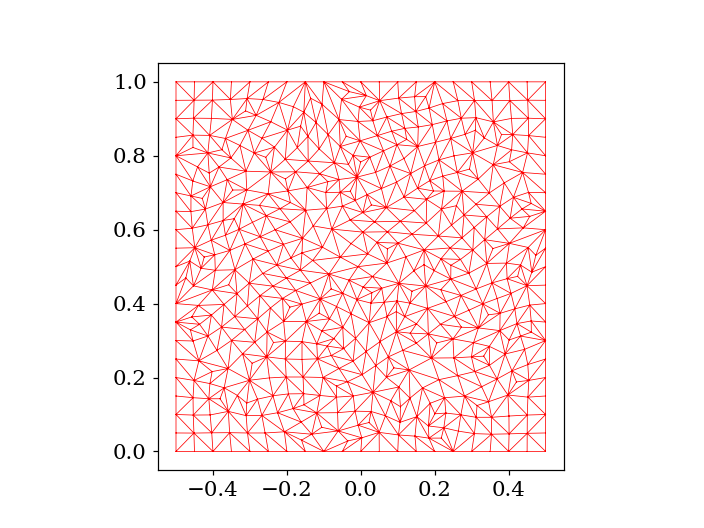

In [13]:
var = geo.mygeom(l, h, c , ietype)
geo.create_mesh(order , var )
nodes , elements , nn = geo.writefiles(ietype , var)
plo.viewmesh(nodes, elements, True)

With can now retrieve the number of nodes of the discretization (nn) and create a nodal coordinates array coords[] and the solution array SOL[]:

In [14]:
coords=np.zeros([nn,2])
SOL = np.zeros([nn]) 
coords[:,0]=nodes[:,1]
coords[:,1]=nodes[:,2]

We now loop trhough all the nn nodal points, retrieve coordinates for each point and evaluate the solution. In this case the function $u = {({x^2} + {y^2}}) ^p$ has been coded and stored with the name myfunction() inside the module elasticity.py. Once the solution is evaluated we store it in the solution aray SOL[] and leav it ready for visualization:

In [15]:
par1 = 1.0
for i in range(0,nn):
    x = coords[i,0]
    y = coords[i,1]
    uu =ela.myfunction(x,y,par1)
    SOL[i] = uu

In the final step and once the solution has been evaluated and stored over the complete set of mesh points we use the appropriate function of the plotting module plotter.py to produce the visualization:

<IPython.core.display.Javascript object>


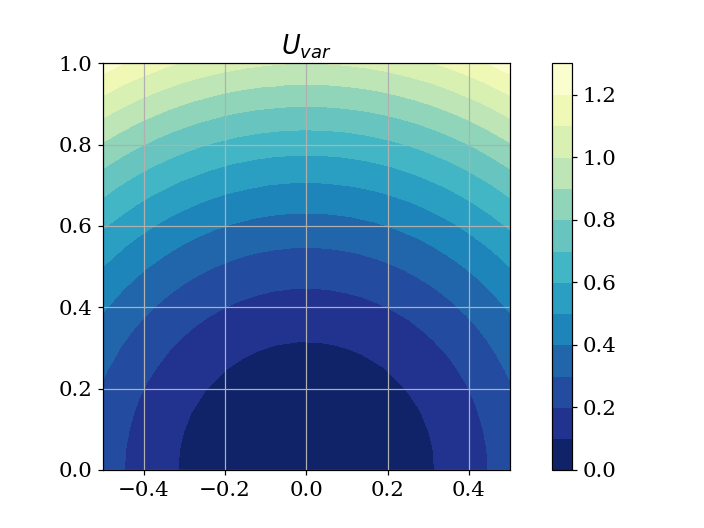

In [16]:
plo.plot_SFIELD(SOL, nodes , elements, 1 , plt_type ="contourf", levels = 12 )

In [17]:
from IPython.core.display import HTML
def css_styling():
    styles = open('styles/custom_barba.css', 'r').read()
    return HTML(styles)
css_styling()